In [83]:
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

from skimage import io, transform

import os, glob

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [0]:

#train_images = glob.glob("/content/drive/My Drive/Colab Notebooks/fingers/train/*.png")
#test_images = glob.glob("/content/drive/My Drive/Colab Notebooks/fingers/test/*.png")

In [0]:
#img_size = 128

In [0]:
X_train = []
X_test = []
y_train = []
y_test = []
count_train = 0;    
for img in train_images:
    count_train +=1
    print("count_train = ",count_train)
    img_read = io.imread(img)
    # Most images are already of size (128,128) but it is always better to ensure they all are
    img_read = transform.resize(img_read, (img_size,img_size), mode = 'constant')
    X_train.append(img_read)
    # The info about the number of fingers and the fact that this is a right or left hand is in two characters of the path
    y_train.append(img[-6:-4])
count_test = 0
for img in test_images:
    count_test +=1
    print("count_test = ",count_test)
    img_read = io.imread(img)
    img_read = transform.resize(img_read, (img_size,img_size), mode = 'constant')
    X_test.append(img_read)
    y_test.append(img[-6:-4])
    

print("count_train = ",count_train)
print("count_test = ",count_test)

count_train =  1
count_train =  2
count_train =  3
count_train =  4
count_train =  5
count_train =  6
count_train =  7
count_train =  8
count_train =  9
count_train =  10
count_train =  11
count_train =  12
count_train =  13
count_train =  14
count_train =  15
count_train =  16
count_train =  17
count_train =  18
count_train =  19
count_train =  20
count_train =  21
count_train =  22
count_train =  23
count_train =  24
count_train =  25
count_train =  26
count_train =  27
count_train =  28
count_train =  29
count_train =  30
count_train =  31
count_train =  32
count_train =  33
count_train =  34
count_train =  35
count_train =  36
count_train =  37
count_train =  38
count_train =  39
count_train =  40
count_train =  41
count_train =  42
count_train =  43
count_train =  44
count_train =  45
count_train =  46
count_train =  47
count_train =  48
count_train =  49
count_train =  50
count_train =  51
count_train =  52
count_train =  53
count_train =  54
count_train =  55
count_train =  56
c

In [86]:
X_train = np.load("/content/drive/My Drive/Colab Notebooks/fingers/X_train128.npy")
y_train = np.load("/content/drive/My Drive/Colab Notebooks/fingers/y_train128.npy")
X_test = np.load("/content/drive/My Drive/Colab Notebooks/fingers/X_test128.npy")
y_test = np.load("/content/drive/My Drive/Colab Notebooks/fingers/y_test128.npy")

FileNotFoundError: ignored

In [0]:
y_train[:5]


array(['0L', '0L', '2L', '0L', '5L'], dtype='<U2')

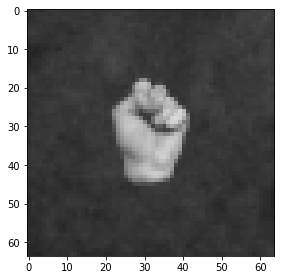

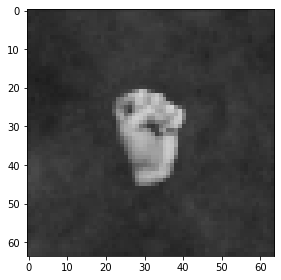

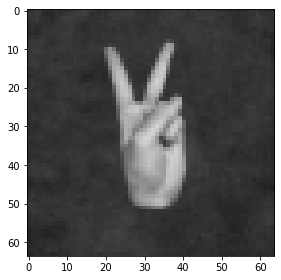

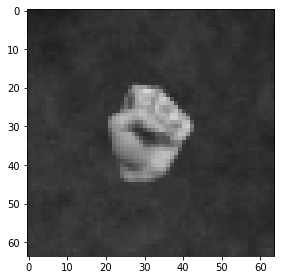

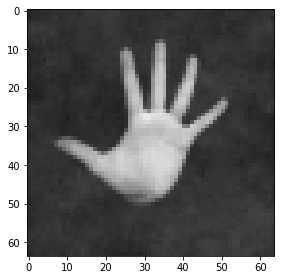

In [0]:
io.imshow(X_train[0])
plt.show()
io.imshow(X_train[1])
plt.show()
io.imshow(X_train[2])
plt.show()
io.imshow(X_train[3])
plt.show()
io.imshow(X_train[4])
plt.show()

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [0]:
print(X_train.shape,X_test.shape)


(18000, 64, 64) (3600, 64, 64)


In [0]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [0]:
label_to_int={
    '0R' : 0,
    '1R' : 1,
    '2R' : 2,
    '3R' : 3,
    '4R' : 4,
    '5R' : 5,
    '0L' : 6,
    '1L' : 7,
    '2L' : 8,
    '3L' : 9,
    '4L' : 10,
    '5L' : 11
}


In [0]:
y_train[1]

'0L'

In [0]:
label_to_int[y_train[1]]

6

In [0]:
temp=[]

In [0]:
temp.append(6)
print(temp)

[1, 6]


In [0]:
k = []
for j in y_train[:5]:
    l = label_to_int[j]
    print(l)
    k.append(l)
temp.append(label_to_int[y_train[1]])
temp

0
6
8
4
8


[1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [0]:
a = []
for i in y_train:
    #print(i)
    z = label_to_int['0L']
    a.append(i)
print(z)

6


In [0]:
temp = []
for label in y_train:
    temp.append(label_to_int[label])
y_train = temp.copy()

In [0]:
temp = []
for label in y_test:
    temp.append(label_to_int[label])
y_test = temp.copy()

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes = 12)
y_test = keras.utils.to_categorical(y_test, num_classes = 12)

In [0]:
weight_decay = 1e-4

num_classes = 12

model = Sequential()

model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(64,64,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())


model.add(Dense(64, activation="linear"))

model.add(Activation('elu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(0.0003), metrics=['accuracy'])
 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 64)        1088      
_________________________________________________________________
activation_15 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        65600     
_________________________________________________________________
activation_16 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)       

In [0]:
model.fit(x = X_train,y = y_train, batch_size=64, validation_data = (X_test,y_test), epochs = 5)

Train on 18000 samples, validate on 3600 samples
Epoch 1/5
 2880/18000 [===>..........................] - ETA: 37:19 - loss: 1.1998 - acc: 0.6580

KeyboardInterrupt: ignored

https://www.kaggle.com/nassimyagoub/cnn-finger-counter-100-accuracy/comments